In [1]:
# librarys

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import math
import random
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from skrebate import ReliefF
from sklearn.model_selection import cross_val_score
from numpy import array
from mlxtend.feature_selection import ColumnSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn import svm
from scipy.stats import *
from sklearn.neighbors import KernelDensity

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
# functions
random_state = 233
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    #     print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
#     print('Kappa: {:.3f}'.format(cohen_kappa_score(y_test, y_pred)))
# #     print('F1 socre: {:.3f}'.format(f1_score(y_test, y_pred)))
# #     print('Recall socre: {:.3f}'.format(recall_score(y_test, y_pred)))
#     print(classification_report(y_test, y_pred))
    return(accuracy_score(y_test, y_pred))

def report(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print('Kappa: {:.3f}'.format(cohen_kappa_score(y_test, y_pred)))
#     print('Recall socre: {:.3f}'.format(recall_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    
def density_plot(locations, data, element):
    # Iterate through the 6 locations
    plt.figure(figsize = (12,9))
    for location in locations:
        # Subset to the locations
        subset = data[data['lv'] == location]

        # Draw the density plot
        sns.distplot(subset[element], hist = True, kde = True, label = location, 
                     kde_kws={"bw":0.37373737373737376})

#                      label = location)
#         sns.kdeplot(subset[element], bw = 0.31992671377973836, label = location, kernel = 'gau')
#         sns.distplot(subset[element], lable = location, hist = True, ax = axes)
    xlabel = element + ' concentration after log 2 scaling'
    # Plot formatting
    plt.legend(prop={'size': 16})
    plt.title('Density Plot')
    plt.xlabel(xlabel)
    plt.ylabel('Density')

In [2]:
def reliefF(data, label, ramdom_state):
    x, y = data.drop(label, axis = 1).values, data[label].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 233)
    fs = ReliefF(n_jobs=-1, n_neighbors=len(x_train))
    fs.fit(x_train,y_train)
    relief_result = pd.DataFrame(columns = ['feature', 'score'])
    relief_result['score'] = fs.feature_importances_
    relief_result['feature'] =data.columns[1:len(data.columns)]
    relief_result=relief_result.sort_values(by=['score'], ascending=False)
    return relief_result

In [4]:
# data = pd.read_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/grand.csv")
# relief_result = pd.read_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/relief_result_python.csv")
data = pd.read_csv("C:/Users/fzkon/Documents/GitHub/Rice_authenticity_ICP_new/grand.csv")
relief_result = pd.read_csv("C:/Users/fzkon/Documents/GitHub/Rice_authenticity_ICP_new/relief_result_python.csv")
relief_result = relief_result.sort_values(by=['Relative importance'], ascending=False)

x = data.loc[:, data.columns != 'lv']
y = data.loc[:, data.columns == 'lv']

In [5]:
mask = data['lv'] != 'GG'

data_dup = data

data_dup['lv'][mask] = 'Non-GG'

In [6]:
relief_result = reliefF(data_dup, 'lv', random_state)

In [7]:
relief_result.head()

,feature,score
25,Cd,0.474044
26,Cs,0.379747
12,Co,0.320601
15,Zn,0.216664
28,Hg,0.186258


In [8]:
x = data_dup.loc[:, data.columns != 'lv']
y = data_dup.loc[:, data.columns == 'lv']

In [12]:
from sklearn.model_selection import LeaveOneOut

In [9]:
bandwidths = np.linspace(0, 1, 100)

In [10]:
bandwidths

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [13]:
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x,y);

In [14]:
grid.best_params_

{'bandwidth': 0.37373737373737376}

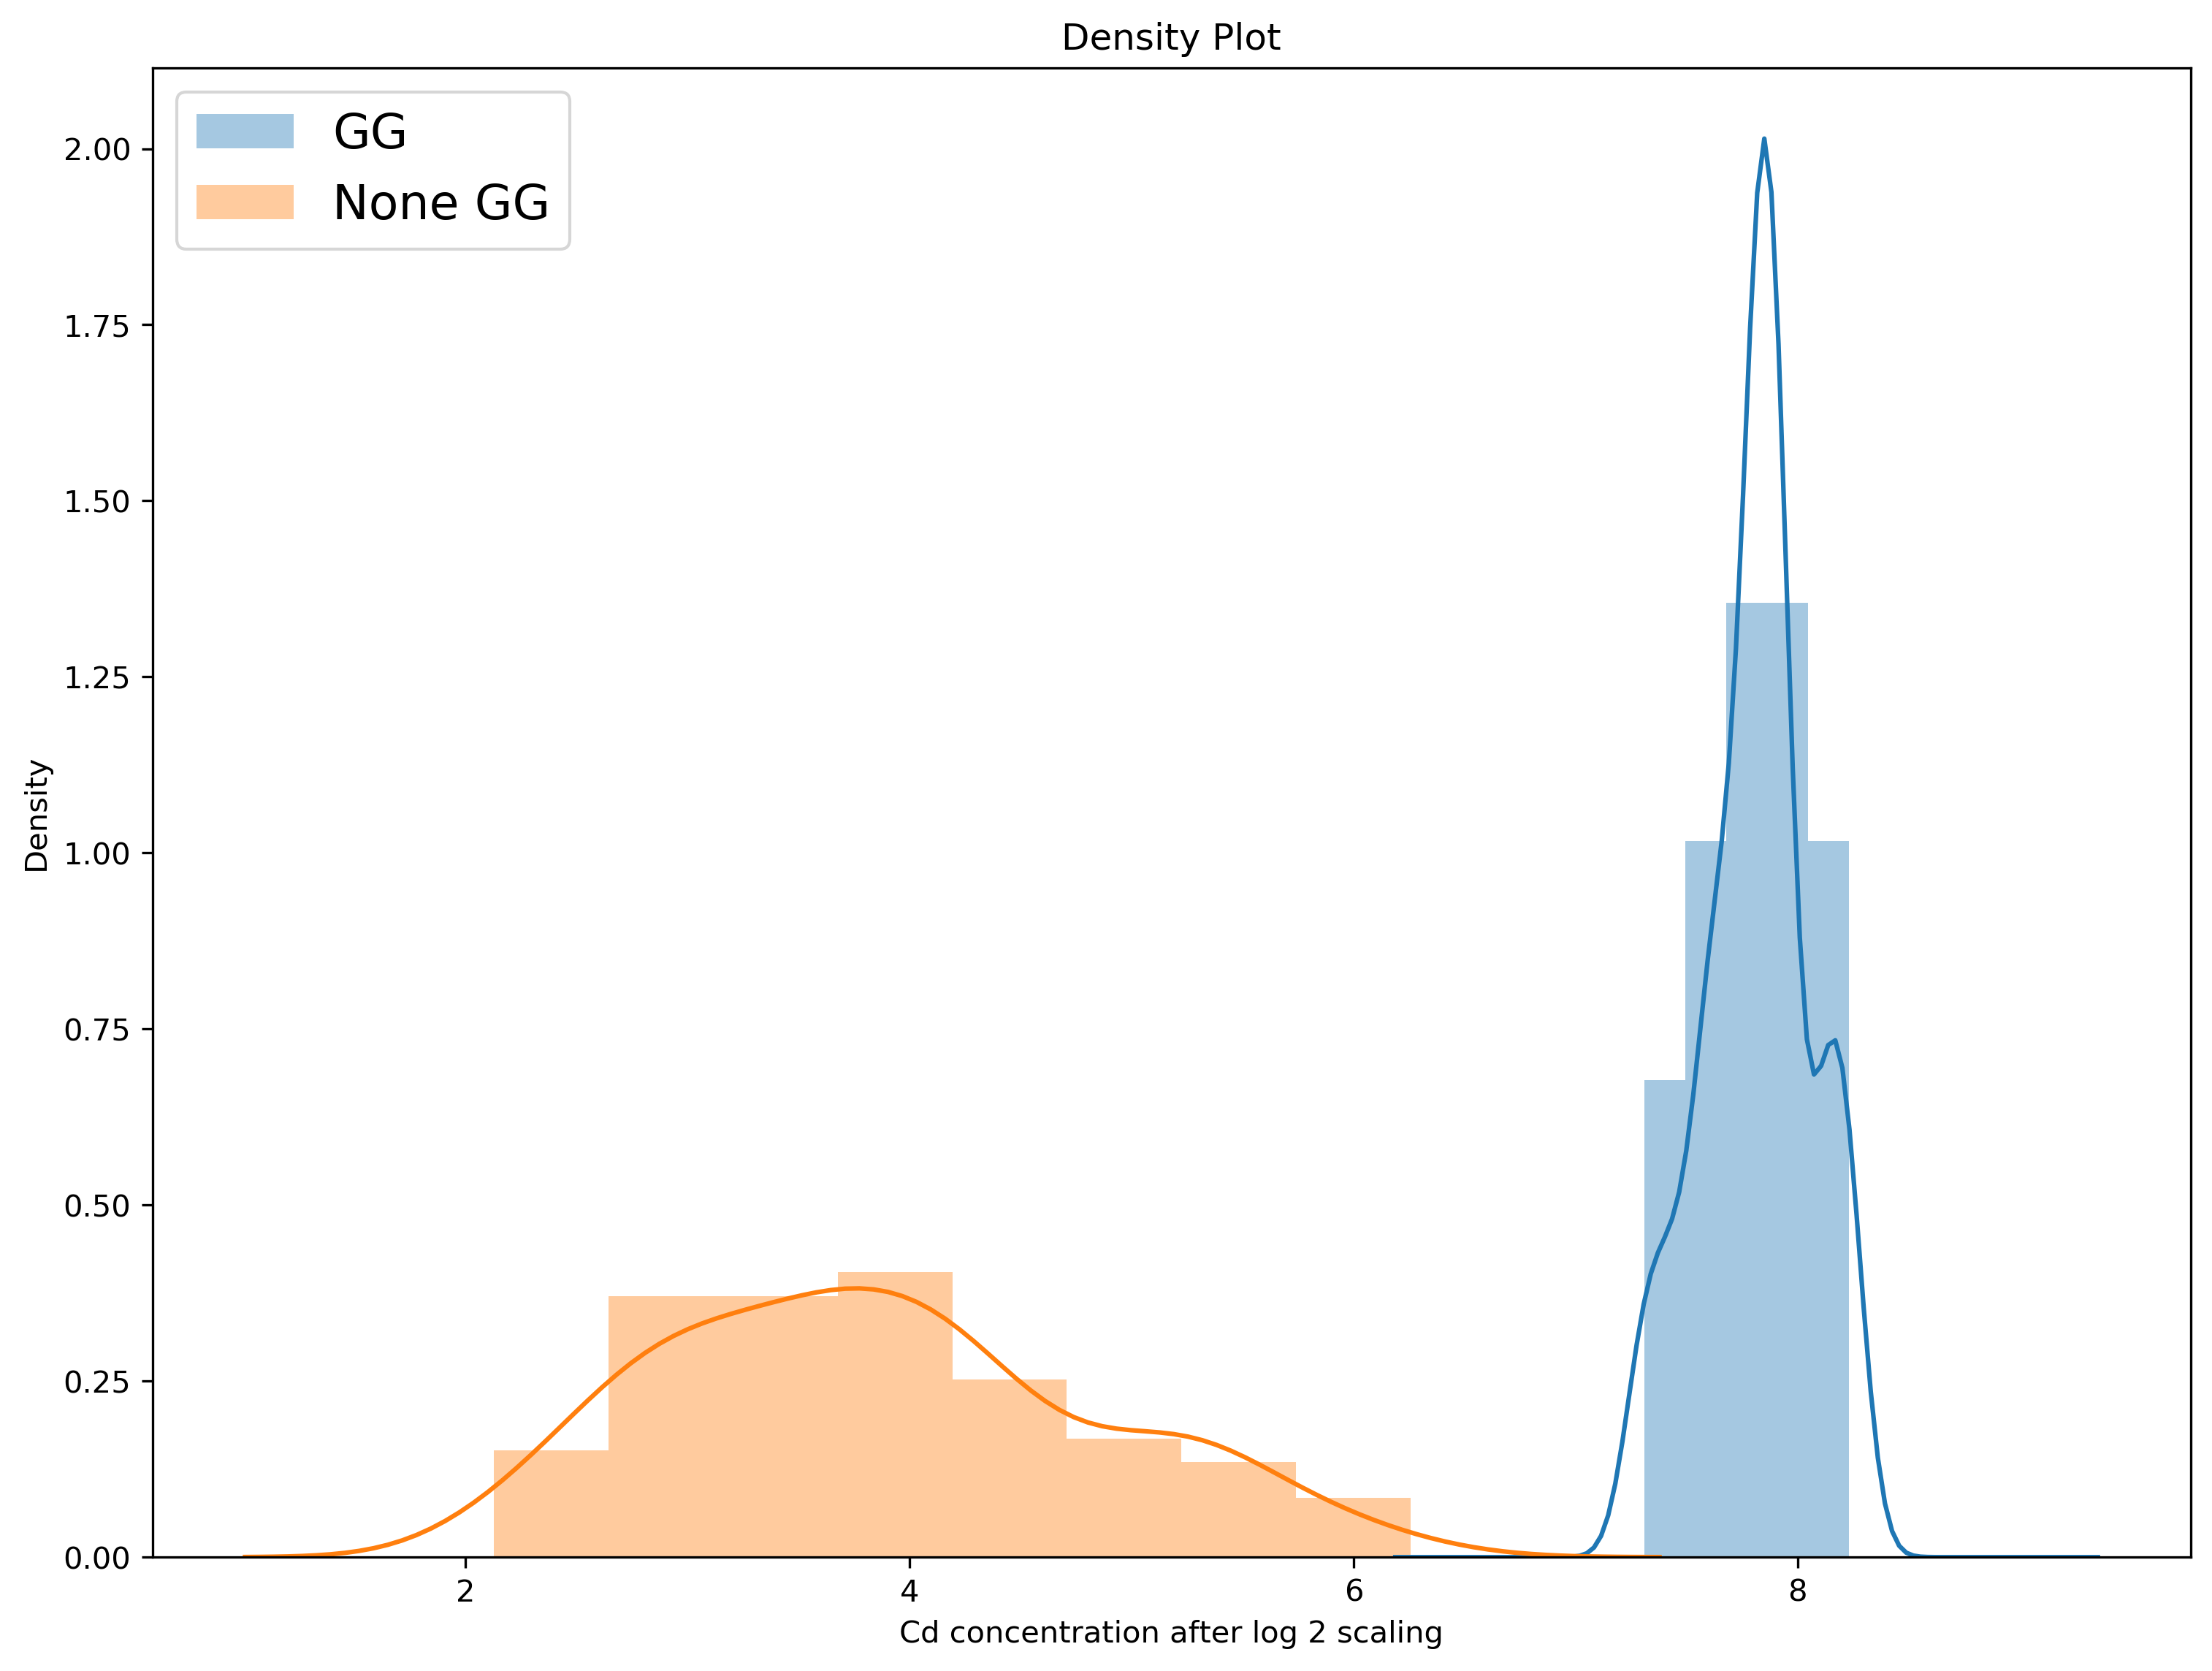

In [55]:
locations = ['GG', 'None-GG']

density_plot(locations, data_dup, 'Cd')

In [56]:
Cd_describe = data_dup.groupby('lv')['Cd'].describe()

In [57]:
Cd_describe

,count,mean,std,min,25%,50%,75%,max
lv,,,,,,,,
GG,16.0,7.815509,0.247596,7.309163,7.661965,7.831344,7.905622,8.231236
None GG,115.0,3.857874,0.965414,2.128293,3.115979,3.756490,4.381431,6.256728


In [27]:
Cd_describe.to_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/Cd_describe.csv")

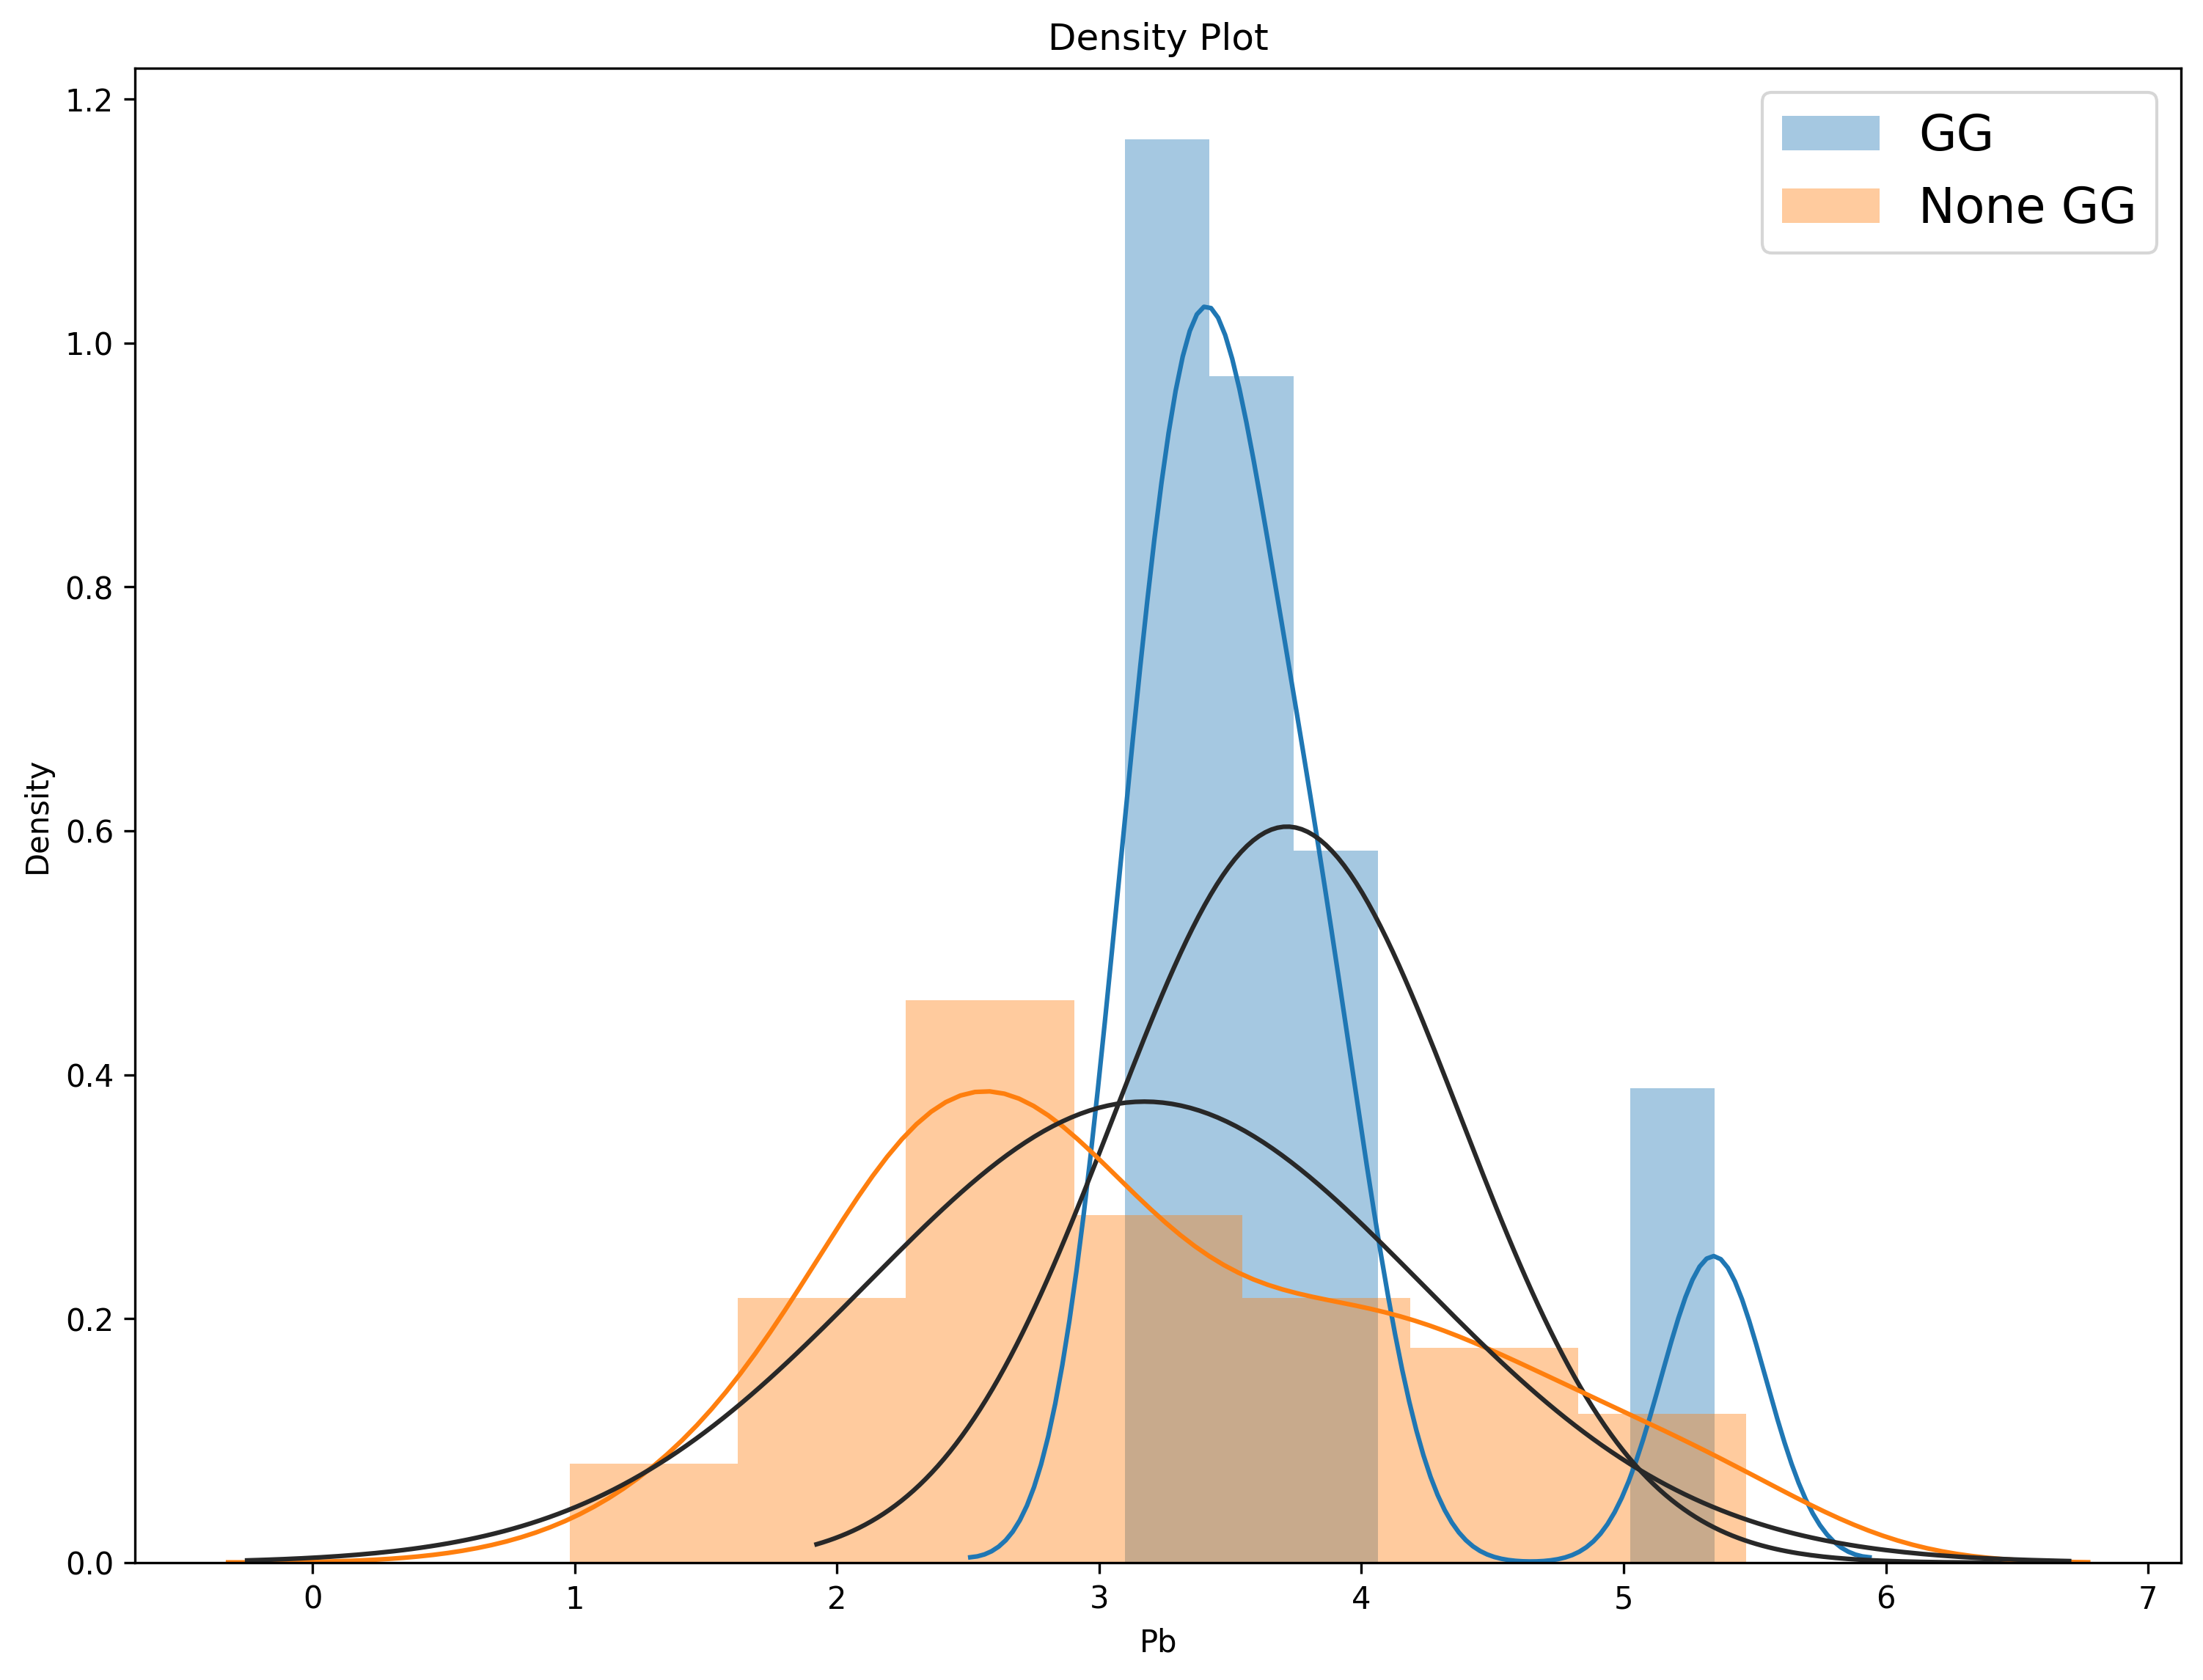

In [13]:
locations = ['GG', 'None GG']

density_plot(locations, data_dup, 'Pb')

In [62]:
data_dup[['lv','Cd']]

,lv,Cd
0,GG,7.823326
1,GG,7.866494
2,None GG,2.288654
3,None GG,3.283774
4,None GG,2.775472
...,...,...
126,None GG,3.014445
127,None GG,3.602647
128,None GG,3.722739
129,None GG,3.575433


In [10]:
mpl.rcParams['figure.dpi'] = 300
# functions
random_state = 233

Text(0.5, 0, '')

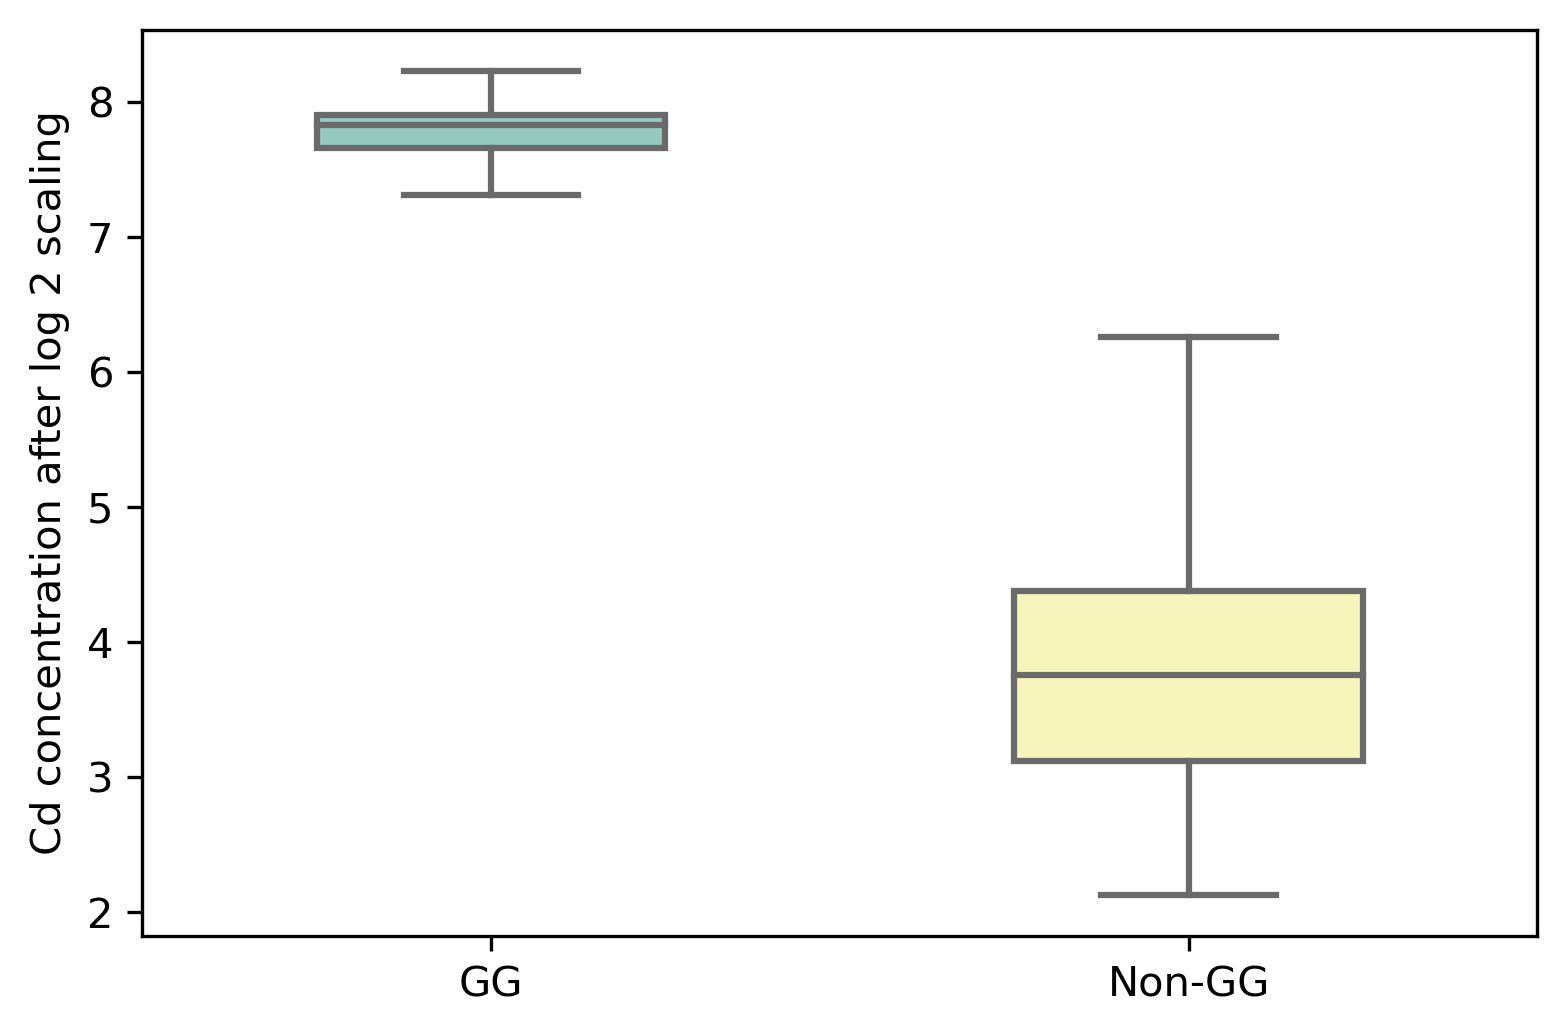

In [12]:
ax = sns.boxplot(x="lv", y="Cd", data=data_dup,  palette="Set3", width = 0.5)
plt.ylabel('Hg concentration after log 2 scaling')
plt.xlabel('')
# plt.title('Boxplot of Cd concentration in GG versus non-GG samples')